In [1]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance fredapi --quiet

In [2]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
from datetime import datetime

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
start = datetime(2019, 1, 1)
end = datetime.today()

In [4]:
# Texas All-Transactions House Price Index (Quarterly)
df_tx_hpi = web.DataReader("TXSTHPI", "fred", start, end)
df_tx_hpi.rename(columns={"TXSTHPI": "Texas_HPI"}, inplace=True)
df_tx_hpi.tail()

,Texas_HPI
DATE,
2024-04-01,519.53
2024-07-01,521.50
2024-10-01,525.16
2025-01-01,526.44
2025-04-01,528.22


### 💡 What this shows:

*The FHFA’s index = a measure of how housing prices have changed over time.
You can later compare this against U.S. averages or interest rates.*

In [6]:
# Texas All-Transactions House Price Index (Quarterly)
df_tx_hpi = web.DataReader("TXSTHPI", "fred", start, end)

# 30-Year Fixed Mortgage Rate (Weekly)
df_mortgage = web.DataReader("MORTGAGE30US", "fred", start, end)

# National Median Household Income (Annual)
df_income = web.DataReader("MEHOINUSA672N", "fred", start, end)

# Merge them together
df_merged = pd.concat([df_tx_hpi, df_mortgage, df_income], axis=1)
df_merged.columns = ["Texas_HPI", "Mortgage_30Y", "US_Income"]

df_merged.tail()

,Texas_HPI,Mortgage_30Y,US_Income
DATE,,,
2025-09-04,NaN,6.50,NaN
2025-09-11,NaN,6.35,NaN
2025-09-18,NaN,6.26,NaN
2025-09-25,NaN,6.30,NaN
2025-10-02,NaN,6.34,NaN


In [7]:
#forward-fill missing values
df_aligned = df_merged.ffill()
df_aligned.tail()

,Texas_HPI,Mortgage_30Y,US_Income
DATE,,,
2025-09-04,528.22,6.50,83730.0
2025-09-11,528.22,6.35,83730.0
2025-09-18,528.22,6.26,83730.0
2025-09-25,528.22,6.30,83730.0
2025-10-02,528.22,6.34,83730.0


In [8]:
#resample to monthly averages
df_monthly = df_merged.resample('M').mean()
df_monthly.tail()

,Texas_HPI,Mortgage_30Y,US_Income
DATE,,,
2025-06-30,NaN,6.8175,NaN
2025-07-31,NaN,6.7200,NaN
2025-08-31,NaN,6.5875,NaN
2025-09-30,NaN,6.3525,NaN
2025-10-31,NaN,6.3400,NaN


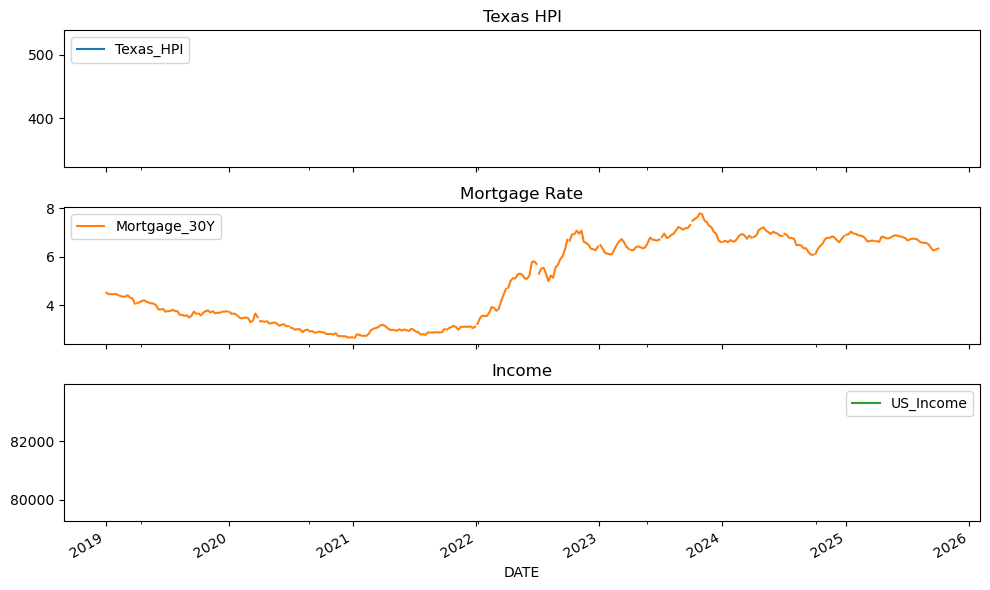

In [9]:
import matplotlib.pyplot as plt

df_merged.plot(subplots=True, figsize=(10, 6), title=["Texas HPI", "Mortgage Rate", "Income"])
plt.tight_layout()
plt.show()

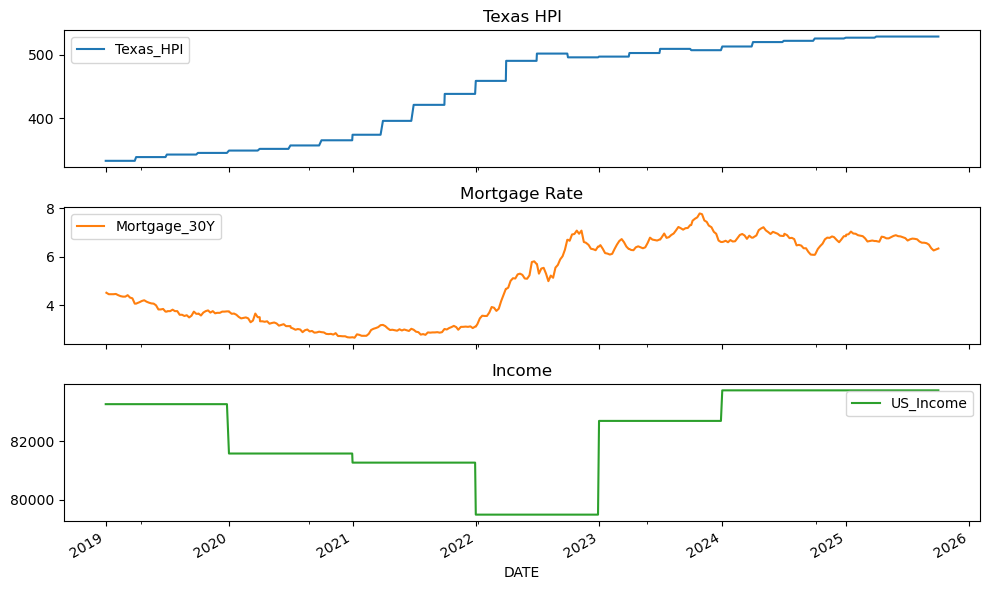

In [10]:
#forward-fill missing values
df_filled = df_merged.ffill()
df_filled.plot(subplots=True, figsize=(10,6), title=["Texas HPI","Mortgage Rate","Income"])
plt.tight_layout()
plt.show()

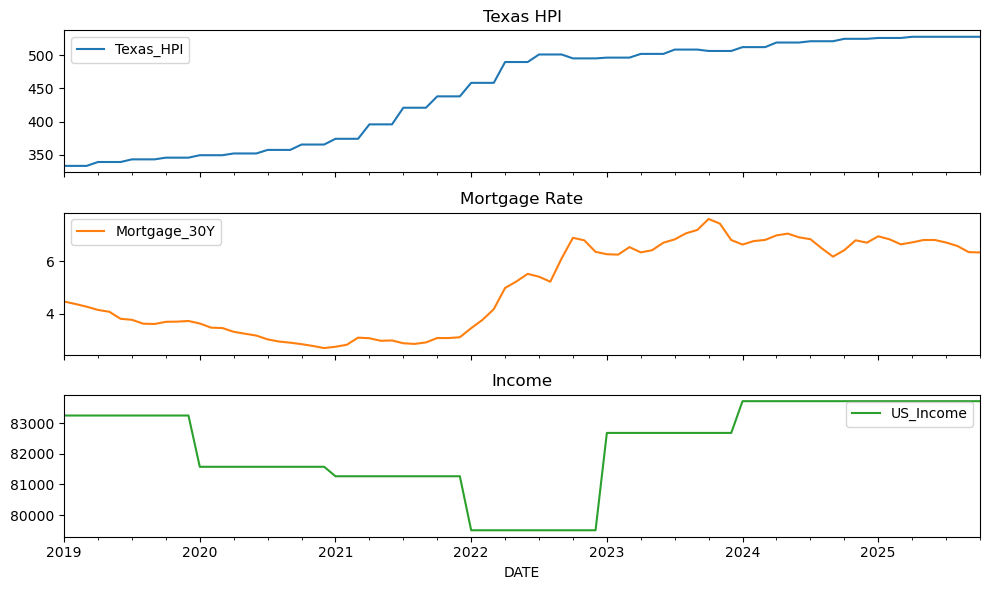

In [11]:
#resample to monthly averages
df_monthly = df_merged.resample('M').mean().ffill()
df_monthly.plot(subplots=True, figsize=(10,6), title=["Texas HPI","Mortgage Rate","Income"])
plt.tight_layout()
plt.show()

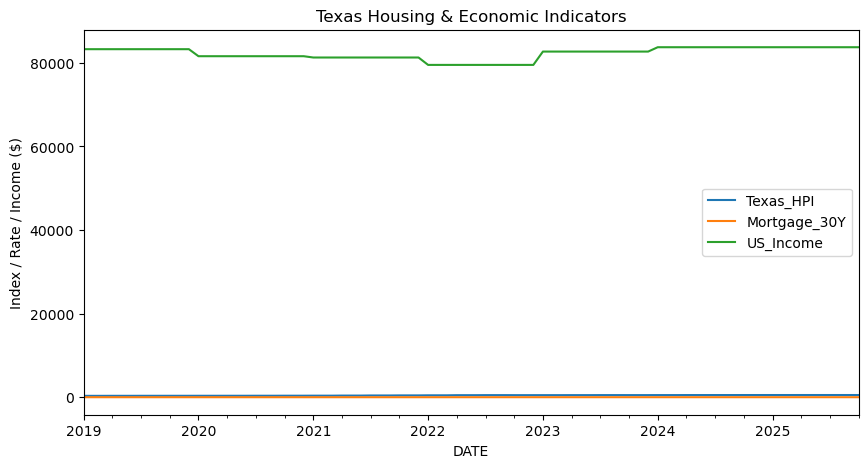

In [12]:
#plot on shared Y axis for comparison
df_monthly.plot(figsize=(10,5))
plt.title("Texas Housing & Economic Indicators")
plt.ylabel("Index / Rate / Income ($)")
plt.show()

### For the following code and graphic
```
this next visualization is a big step toward true analysis. It lets you compare the relative movement of all indicators (HPI, Mortgage Rate, Income) on the same scale, so you can see how they rise and fall together or diverge — exactly what investors and analysts look for.

🧭 How to Read It
	•	All three lines start at 0 (their lowest point) and reach 1 (their highest point).
	•	This removes unit differences (prices vs % vs dollars) and focuses purely on directional change.
	•	Example insights you’ll likely see:
	•	Mortgage rates spike while HPI growth slows or dips → affordability tightening.
	•	When Income growth lags behind HPI → reduced investor opportunity window.
```

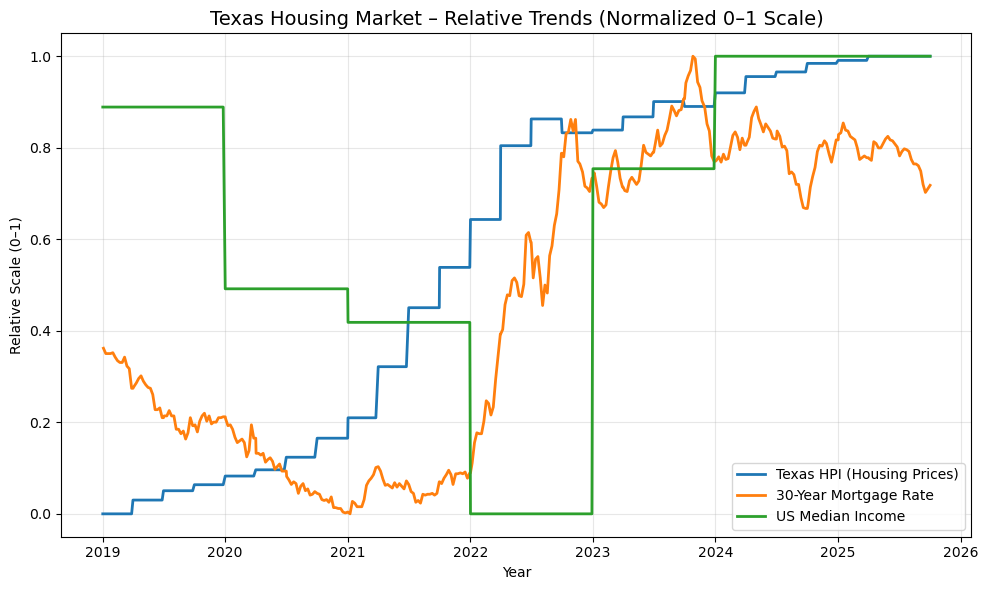

In [13]:
# Normalize and overlay indicators for comparison
import matplotlib.pyplot as plt

# Step 1 — Fill gaps so each series aligns in time
df_normalized = df_merged.ffill()

# Step 2 — Normalize each column to a 0–1 scale
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

# Step 3 — Plot all three lines together
plt.figure(figsize=(10,6))
plt.plot(df_normalized.index, df_normalized['Texas_HPI'], label='Texas HPI (Housing Prices)', linewidth=2)
plt.plot(df_normalized.index, df_normalized['Mortgage_30Y'], label='30-Year Mortgage Rate', linewidth=2)
plt.plot(df_normalized.index, df_normalized['US_Income'], label='US Median Income', linewidth=2)

# Step 4 — Format for clarity
plt.title("Texas Housing Market – Relative Trends (Normalized 0–1 Scale)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Relative Scale (0–1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()